<span style="color: blue; font-size: 20px; font-weight: bold;">Комментарий ревьюера</span>

<span style="color: blue">Привет, Владимир! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</span>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u>⤵</summary>
<span style="color: blue">Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</span>


---


<span style="color: blue">синий текст - просто текст комментария</span>

<span style="color: green">✔️ и зеленый текст - все отлично</span>

<span style="color: orange">⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</span>

<span style="color: red">❌ и красный текст - есть недочеты</span>


</details>    
</br>
<span style="color: blue">Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное.</span>

<span style="color: blue">Ответы на мои комментарии лучше тоже помечать.<br>
Например: </span><br><span style="color: purple; font-weight: bold">Комментарий студента</span>

<span style="color: blue; font-weight: bold;">Давай смотреть, что получилось!</span>

<span style="color: blue; font-size: 18px; font-weight: bold;">Комментарий ревьюера 2</span>

<span style="color: blue">Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</span> 

# Персонализация предложений для интернет-магазина  «В один клик» #

## О проекте ##
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов.

Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Задачи проекта:**
* Построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца
* В исследование включить дополнительные данные о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца
* Используя данные модели и данные о прибыльности клиентов, выделить сегменты покупателей и разработать для них персонализированные предложения

**Решение:**
собрать данные по клиентам по следующим группам:
* Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
* Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
* Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
* Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

![Картинка](https://pictures.s3.yandex.net/resources/image_1695485033.png)

## Загрузка библиотек ##

In [1]:
!pip install --upgrade scikit-learn numba numpy matplotlib seaborn
!pip install phik shap

  Using cached numpy-2.0.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
     |████████████████████████████████| 294 kB 2.2 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [2]:
import pandas as pd
from pandas.api.types import is_string_dtype

import numpy as np
import math

import matplotlib
from matplotlib import pyplot as plt

import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score

from phik import phik_matrix
from phik.report import plot_correlation_matrix

import shap

import seaborn as sns

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, разделены на функциональные группы пустой строкой.</font>

In [3]:
#Функция вывода уникальных значений для строковых колонок
def print_unique_values(df):
    for column in df.columns:
        if is_string_dtype(df[column]):
            print(f'{column}: {df[column].unique()}')
            
#Функция проверки данных по датасету
def check_df(df):
    display(df.head(5))
    print(df.info())
    try: 
        print(round(df.describe().T[['count', 'min', 'max', 'mean']], 3))
    except:
        print('Нет количественных данных для описания')
    print('')
    print('Дубликатов: ' + str(df.duplicated().sum()))
    if df.isna().sum().sum() > 0:
        print('Пропуски:')
        print(df.isna().sum())
    else:
        print('Пропусков: 0')
    print('')
    print_unique_values(df)

In [4]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

### Промежуточные итоги ###
* Обновили версии библиотек:
  * sklearn:  1.5.1
  * matplotlib:  0.60.0
  * matplotlib:  1.24.4
  * matplotlib:  3.9.1
* Установили дополнительные библиотеки:
  * phik:  0.12.4
  * shap:  0.46.0
* Добавили функцию check_df для проверки данных в датасете
* Установили глобальные переменные

## Загрузка данных ##
- [x] Загрузите данные. Файлы market_file.csv, market_money.csv, market_time.csv, money.csv доступны по ссылкам в описании данных или через пути к ним:
 * /datasets/market_file.csv
 * /datasets/market_money.csv
 * /datasets/market_time.csv
 * /datasets/money.csv
 * Обратите внимание: в некоторых файлах разделитель значений — точка с запятой, а разделитель десятичных значений — запятая.  
- [X] Проверьте, что данные в таблицах соответствуют описанию. Исследованием и объединением данных вы займётесь позже.

In [5]:
market_file = pd.read_csv('/datasets/market_file.csv')
check_df(market_file)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [6]:
market_money = pd.read_csv('/datasets/market_money.csv')
check_df(market_money)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
None
          count       min       max        mean
id       3900.0  215348.0  216647.0  215997.500
Выручка  3900.0       0.0  106862.2    5025.696

Дубликатов: 0
Пропусков: 0

Период: ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


In [7]:
market_time = pd.read_csv('/datasets/market_time.csv')
check_df(market_time)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
None
        count       min       max        mean
id     2600.0  215348.0  216647.0  215997.500
минут  2600.0       4.0      23.0      13.336

Дубликатов: 0
Пропусков: 0

Период: ['текущий_месяц' 'предыдцщий_месяц']


In [8]:
money = pd.read_csv('/datasets/money.csv', sep = ';', decimal=',')
check_df(money)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB
None
          count        min        max        mean
id       1300.0  215348.00  216647.00  215997.500
Прибыль  1300.0       0.86       7.43       3.997

Дубликатов: 0
Пропусков: 0



<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

### Промежуточные итоги ###
* Загрузили 4 датасета: market_file, market_money, market_time, money
* В датасете money уточнили формат: разделитель – точка с запятой, разделитель разрядов – запятая

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

## Предобработка данных ##
- [x] Проведите необходимую предобработку данных. Названия столбцов можно оставить кириллическими.

In [9]:
#Функция приведения всех строковых столбцов к нижнему регистру
def df_to_lower_case(df):
    for i in df.columns:
        if is_string_dtype(df[i]):
            df[i] = df[i].str.lower()

In [10]:
df_to_lower_case(market_file)
market_file.loc[market_file['Тип сервиса'] == 'стандартт', 'Тип сервиса'] = 'стандарт'
print_unique_values(market_file)

Покупательская активность: ['снизилась' 'прежний уровень']
Тип сервиса: ['премиум' 'стандарт']
Разрешить сообщать: ['да' 'нет']
Популярная_категория: ['товары для детей' 'домашний текстиль' 'косметика и аксесуары'
 'техника для красоты и здоровья' 'кухонная посуда'
 'мелкая бытовая техника и электроника']


<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [11]:
market_time = market_time.rename(columns={'минут': 'Минут'})
print(market_time.columns)

Index(['id', 'Период', 'Минут'], dtype='object')


In [12]:
market_time.loc[market_time['Период'] == 'предыдцщий_месяц', 'Период'] = 'предыдущий_месяц'
print_unique_values(market_time)

Период: ['текущий_месяц' 'предыдущий_месяц']


<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

### Промежуточные итоги ###
* Все данные привели к нижнему регистру, названия колонок – с прописной
* Исправили опечатки

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>Здорово, что не забываешь про промежуточные выводы.</font>

## Исследовательский анализ данных ##
- [x] Проведите исследовательский анализ данных из каждой таблицы. Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Оформите выводы по результатам шага.

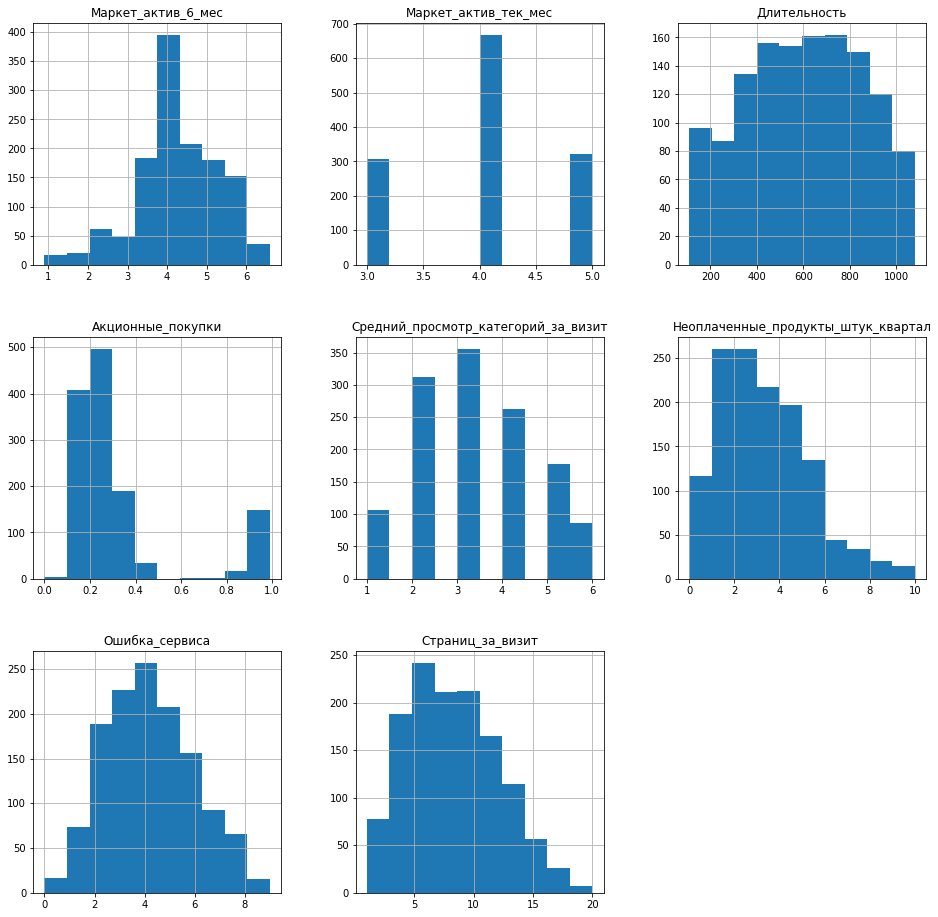

In [13]:
market_file[market_file.columns[1:]].hist(bins=10, figsize=(16, 16));

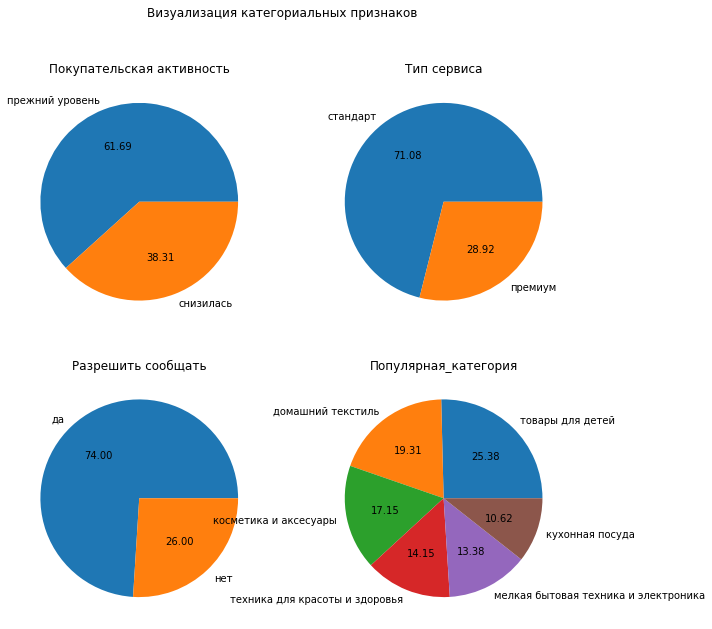

In [14]:
cols = ['Покупательская активность', 'Тип сервиса', 'Разрешить сообщать', 'Популярная_категория']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for i, col_name in enumerate(cols):
    ax = axes[i // 2, i % 2]
    market_file[col_name].value_counts().plot(kind='pie', ax=ax, legend=False, autopct='%.2f')
    ax.set(xlabel='', ylabel='', title=col_name)

plt.suptitle('Визуализация категориальных признаков')
plt.show()

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: Выручка, dtype: float64


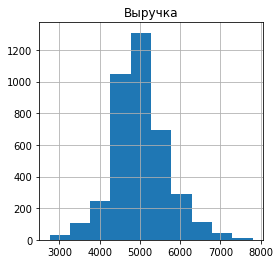

In [15]:
print(market_money['Выручка'].describe())

#Удалилим клиентов без покупок за 3 месяца (с нулевой выручкой) и клиентов с аномально высоким значением (выбросы)
market_money = market_money.query('Выручка > 0 & Выручка < 10000')
market_money[market_money.columns[1:]].hist(bins=10, figsize=(4, 4));

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ⚠️\
<span style="color: darkorange"> Хорошо бы объяснить что и почему здесь удаляется.</span>

<span style="color: purple; font-weight: bold">Комментарий студента</span><br>
✅ Объяснили

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ⚠️\
<span style="color: darkorange"> Такие комменты лучше писать  ячейках Markdown.</span>

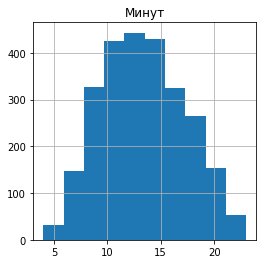

In [16]:
market_time[market_time.columns[1:]].hist(bins=10, figsize=(4, 4));

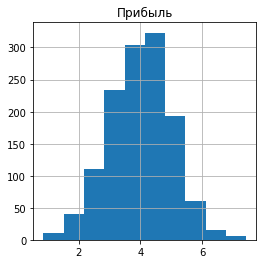

In [17]:
money[money.columns[1:]].hist(bins=10, figsize=(4, 4));

### Промежуточные итоги ###
* Удалили клиентов с нулевым значением выручки
* удалили выбросы с аномально высокими значениями выручки
* Среднемесячное количество коммуникаций не менялось за последние 6 месяцев и в среднем составляет 4
* Доля покупок по акции обычно низкая (доля от 0.2 до 0.4), но видна группа покупателей баунти-хантеров, покупающи преимущественно по акциям (доля более 0.8)
* В признаках 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать' наблюдаем дисбалланс классов
* Данные в датасетах market_money, market_time, money распределены околонормально

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

## Объединение таблиц ##
- [x] Объедините таблицы market_file.csv, market_money.csv, market_time.csv. Данные о прибыли из файла money.csv при моделировании вам не понадобятся. 
- [x] Учитывайте, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделайте отдельный столбец для каждого периода.

In [18]:
market_money = market_money.pivot(index='id', columns='Период', values='Выручка').reset_index()
market_money.rename(columns={
    'текущий_месяц': 'Выручка_текущий_месяц',
    'предыдущий_месяц': 'Выручка_предыдущий_месяц',
    'препредыдущий_месяц': 'Выручка_препредыдущий_месяц'
}, inplace=True)
market_money = market_money.rename_axis(None, axis=1)
display(market_money.head(5))
print(market_money.shape)

,id,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц
0,215348,NaN,NaN,3293.1
1,215349,5216.0,4472.0,4971.6
2,215350,5457.5,4826.0,5058.4
3,215351,6158.0,4793.0,6610.4
4,215352,5807.5,4594.0,5872.5


(1300, 4)


In [19]:
market_time = market_time.pivot(index='id', columns='Период', values='Минут').reset_index()
market_time.rename(columns={
    'текущий_месяц': 'Минут_текущий_месяц',
    'предыдущий_месяц': 'Минут_предыдущий_месяц',
    'препредыдущий_месяц': 'Минут_препредыдущий_месяц'
}, inplace=True)
market_time = market_time.rename_axis(None, axis=1)
display(market_time.head(5))
print(market_time.shape)

,id,Минут_предыдущий_месяц,Минут_текущий_месяц
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11


(1300, 3)


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Отлично!  Развернули таблицы.</font>

In [20]:
market_df = market_file.merge(market_money, on='id', how='outer').merge(market_time, on='id', how='outer')

print(market_df.shape)
display(market_df.head(5))

(1300, 18)


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц,Минут_предыдущий_месяц,Минут_текущий_месяц
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары для детей,6,2,1,5,NaN,NaN,3293.1,13,14
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Верно, при объединении таблиц нужно привязаться к уникальному `"id"`.</font>

In [21]:
print(market_df.isna().sum(), market_df.shape)
market_df = market_df.dropna()

print(market_df.shape)

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
Выручка_предыдущий_месяц               3
Выручка_препредыдущий_месяц            3
Выручка_текущий_месяц                  1
Минут_предыдущий_месяц                 0
Минут_текущий_месяц                    0
dtype: int64 (1300, 18)
(1296, 18)


In [22]:
market_df['Выручка_разница_текущий_месяц'] = market_df['Выручка_текущий_месяц'] - market_df['Выручка_предыдущий_месяц']
market_df['Выручка_разница_предыдущий_месяц'] = market_df['Выручка_предыдущий_месяц'] - market_df['Выручка_препредыдущий_месяц']

### Промежуточные итоги ###
* Разнесли выручку в датасете market_money по колонкам, соответствующим периодам. Сократили количество строк
* Разнесли время в датасете market_time по колонкам, соответствующим периодам. Сократили количество строк
* Количество строк по объединяемым датасетам market_file, market_money, market_time равно 1300
* После объединения удалили 4 записи с пропусками (появились при разнесении признаков и объединении данных из датафрейма market_money)
* Добавили признак Выручка_разница_предыдущий_месяц (разница в выручке предыдущего и препредыдущего месяцев)
* Добавили признак Выручка_разница_текущий_месяц (разница в выручке текущего и предыдущего месяцев)
* Видим признаки, которых нет на диаграмме Исикавы: Акционные_покупки и Страниц_за_визит
* Не хватает данных для признаков Время_на_сайте_за_прошлый_год и Минут_за_визит

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

## Корреляционный анализ ##
- [x] Проведите корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования.
- [x] Сделайте выводы о мультиколлинеарности и при необходимости устраните её.

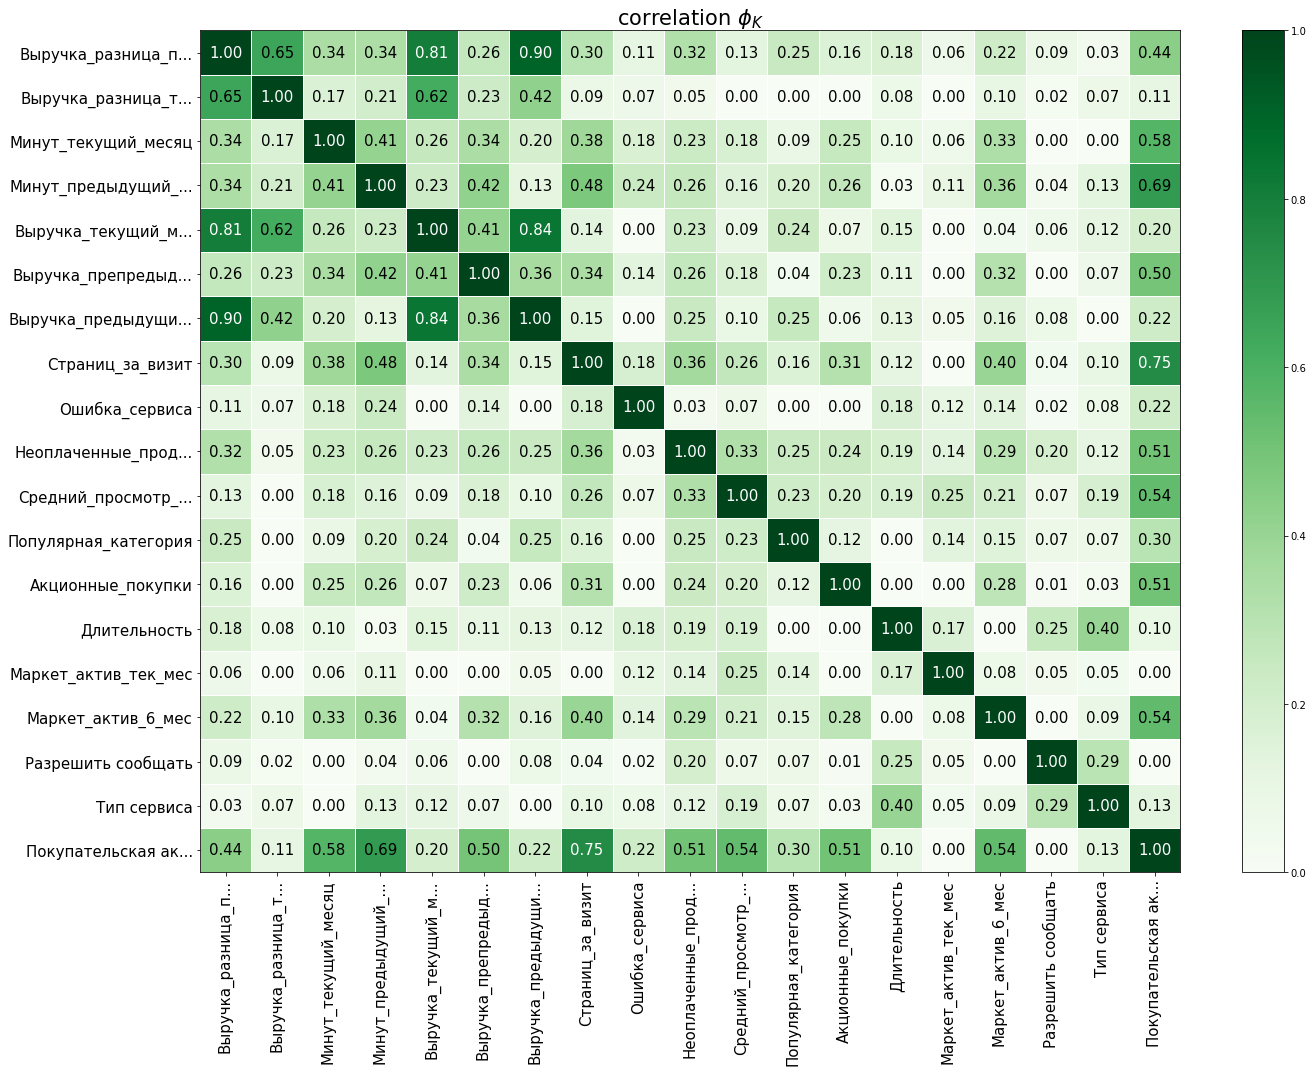

In [23]:
interval_cols = [
    'Маркет_актив_6_мес',
    'Маркет_актив_тек_мес',
    'Длительность',
    'Акционные_покупки',
    'Средний_просмотр_категорий_за_визит',
    'Неоплаченные_продукты_штук_квартал',
    'Ошибка_сервиса',
    'Страниц_за_визит',
    'Выручка_препредыдущий_месяц',
    'Выручка_предыдущий_месяц',
    'Выручка_текущий_месяц',
    'Выручка_разница_текущий_месяц',
    'Выручка_разница_предыдущий_месяц',
    'Минут_предыдущий_месяц',
    'Минут_текущий_месяц' 
]

phik_overview = phik_matrix(market_df.drop('id', axis=1), interval_cols=interval_cols)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

In [24]:
'''
plt.figure(figsize=(16, 6))
(sns
 .heatmap(market_df[interval_cols].corr(method='spearman'), annot=True, cmap='summer', fmt=".2f")
 .set(title='Корреляции')
)
plt.show()
'''

'\nplt.figure(figsize=(16, 6))\n(sns\n .heatmap(market_df[interval_cols].corr(method=\'spearman\'), annot=True, cmap=\'summer\', fmt=".2f")\n .set(title=\'Корреляции\')\n)\nplt.show()\n'

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Закомментированный код лучше удалять из проекта. Он создаёт впечатление неоконченой работы.</font>

In [25]:
market_df = market_df.drop(['Выручка_разница_предыдущий_месяц'], axis=1)

### Промежуточные итоги ###
* Удалили синтетически выведенный ранее признак Выручка_разница_предыдущий_месяц, так как он сильно коррелирует с выручкой предыдущего месяца
* Сильной (более 0.9) корреляции (мультиколлинеарности) между другими признаками не обнаружили

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Здорово,что применена `phik` для анализа и нелинейных зависимостей</font>

## Использование пайплайнов ##
Примените все изученные модели. Для этого используйте пайплайны.
- [x] Во время подготовки данных используйте ColumnTransformer. Количественные и категориальные признаки обработайте в пайплайне раздельно. Для кодирования категориальных признаков используйте как минимум два кодировщика, для масштабирования количественных — как минимум два скейлера.
Напоминаем, что для каждой модели можно подготовить данные с разным кодированием и масштабированием.
- [x] Обучите четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). Для каждой из них подберите как минимум один гиперпараметр. Выберите подходящую для задачи метрику, аргументируйте свой выбор. Используйте эту метрику при подборе гиперпараметров.
- [x] Выберите лучшую модель, используя заданную метрику. Для этого примените одну из стратегий:
 * использовать пайплайны и инструменты подбора гиперпараметров для каждой модели отдельно, чтобы выбрать лучшую модель самостоятельно;
 * использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт вам лучшую модель.

In [26]:
market_df = market_df.set_index('id')

X_train, X_test, y_train, y_test = train_test_split(
    market_df.drop(['Покупательская активность'], axis=1),
    market_df['Покупательская активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = market_df['Покупательская активность'])

print(X_train.shape, X_test.shape)
display(X_train.head())

(972, 17) (324, 17)


,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц,Минут_предыдущий_месяц,Минут_текущий_месяц,Выручка_разница_текущий_месяц
id,,,,,,,,,,,,,,,,,
215858,стандарт,да,5.5,4,510,0.15,мелкая бытовая техника и электроника,2,4,7,16,5170.5,4347.0,6014.2,20,6,843.7
215361,стандарт,да,5.1,4,199,0.23,техника для красоты и здоровья,4,5,2,3,6400.0,4597.0,3789.7,11,13,-2610.3
215884,стандарт,да,4.3,5,997,0.17,мелкая бытовая техника и электроника,5,1,3,11,4113.0,4626.0,3798.4,13,10,-314.6
216564,стандарт,да,5.6,4,342,0.94,кухонная посуда,2,7,5,8,4930.0,5269.0,4766.2,14,19,-163.8
215715,премиум,да,3.6,5,873,0.39,товары для детей,3,2,2,5,3716.0,4691.0,4600.0,10,10,884.0


In [27]:
ohe_columns = ['Разрешить сообщать', 'Популярная_категория']
ord_columns = ['Тип сервиса']
num_columns = [
    'Маркет_актив_6_мес',
    'Маркет_актив_тек_мес',
    'Длительность',
    'Акционные_покупки',
    'Средний_просмотр_категорий_за_визит',
    'Неоплаченные_продукты_штук_квартал',
    'Ошибка_сервиса',
    'Страниц_за_визит',
    'Выручка_препредыдущий_месяц',
    'Выручка_предыдущий_месяц',
    'Выручка_текущий_месяц',
    'Выручка_разница_текущий_месяц',    
    'Минут_предыдущий_месяц',
]

ohe_pipe = Pipeline([
    ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

ord_pipe = Pipeline([
    ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ord', OrdinalEncoder(categories=[['стандарт', 'премиум']], handle_unknown='use_encoded_value', unknown_value=np.nan)),
    ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,5),
        'models__max_features': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [SVC(probability= True, kernel='linear', random_state=RANDOM_STATE)],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Разрешить сообщать',
                                                   'Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                        

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~В SVC нужно передать аргумент probability= True. Что бы можно было работать с вероятностями, если модель выиграет.~~</font>

<span style="color: purple; font-weight: bold">Комментарий студента</span><br>
✅ Добавили

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Нужно аргументировать выбор метрики.~~</font>

<span style="color: purple; font-weight: bold">Комментарий студента</span><br>
✅ Аргументировали (ниже)

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ⚠️\
<span style="color: darkorange"> Условия эксперимента принято описывать До эксмеримента, чтобы исключить подгонку результата.</span>

### Промежуточные итоги ###
* Метрикой оценки качества выбрали ROC-AUC, так как видим дизбаланс классов в исходных данных (отображено на графиках выше), .
* Лучший результат показала модель LogisticRegression с гиперпараметрами C=1 и penalty=l1
* Оценка модели по метрике roc_auc на тренировочной выборке: 0.89615

## Анализ важности признаков ##
- [x] Оцените важность признаков для лучшей модели и постройте график важности с помощью метода SHAP. 
- [x] Сделайте выводы о значимости признаков:
 * какие признаки мало значимы для модели;
 * какие признаки сильнее всего влияют на целевой признак;
 * как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.

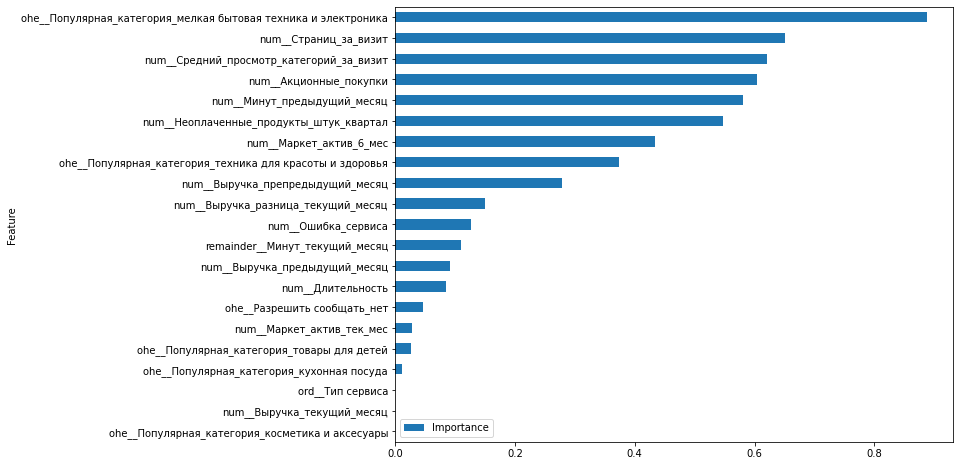

In [28]:
best_model = randomized_search.best_estimator_.named_steps['models']
preprocessor = randomized_search.best_estimator_.named_steps['preprocessor']
features = preprocessor.get_feature_names_out()

feature_importance = pd.DataFrame({'Feature': features, 'Importance': np.abs(best_model.coef_[0])})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 8));

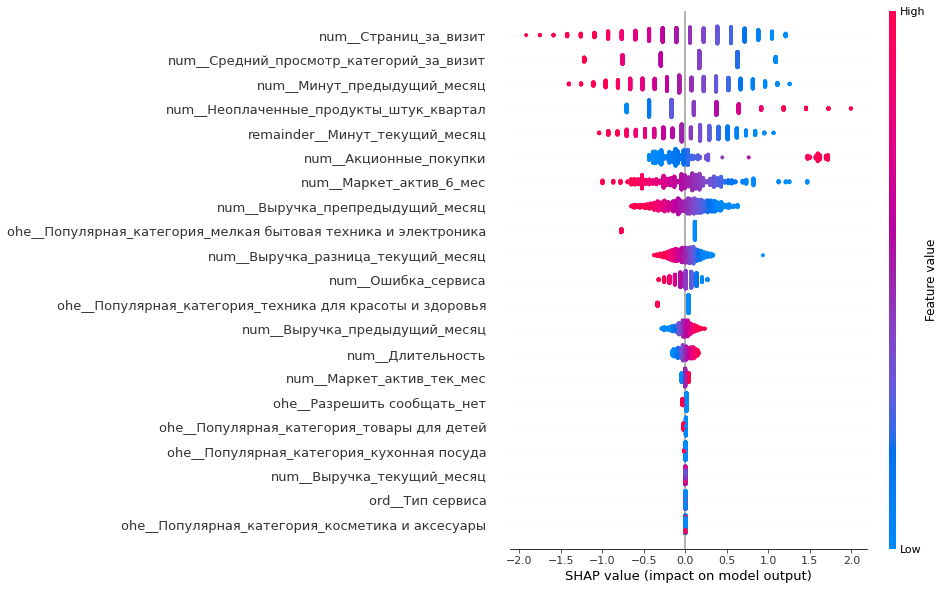

In [29]:
X_train_transformed = pd.DataFrame(preprocessor.transform(X_train), columns = features)

explainer = shap.LinearExplainer(best_model, X_train_transformed)
shap_values = explainer(X_train_transformed)

shap.plots.beeswarm(shap_values, max_display=25)

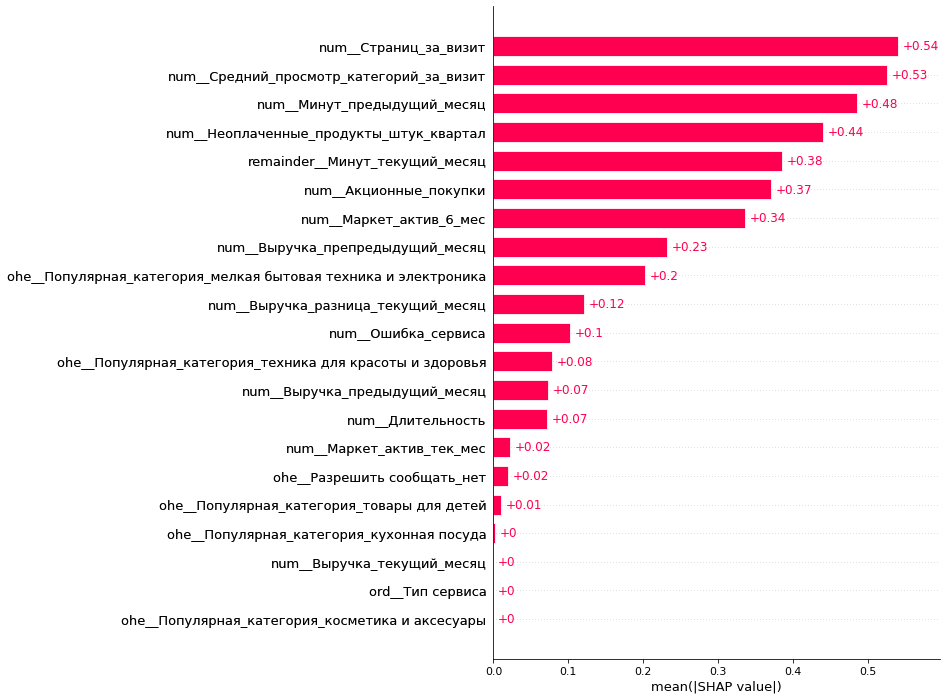

In [30]:
shap.plots.bar(shap_values, max_display=25) 

In [31]:
#shap.plots.waterfall(shap_values[0])

**Признаки в порядке убывания значимости:**
* 'num__Страниц_за_визит'
* 'num__Средний_просмотр_категорий_за_визит'
* 'num__Минут_предыдущий_месяц'
* 'num__Неоплаченные_продукты_штук_квартал'
* 'remainder__Минут_текущий_месяц'
* 'num__Акционные_покупки'
* 'num__Маркет_актив_6_мес'
* 'num__Выручка_препредыдущий_месяц'
* 'ohe__Популярная_категория_мелкая бытовая техника и электроника',
* 'remainder__Выручка_разница_текущий_месяц'
* 'num__Ошибка_сервиса'
* 'ohe__Популярная_категория_техника для красоты и здоровья'
* 'num__Выручка_предыдущий_месяц'
* 'num__Длительность'

**Признаки, значение которых незначительно:**
* 'num__Маркет_актив_тек_мес'
* 'ohe__Разрешить сообщать_нет'
* 'ohe__Популярная_категория_товары для детей'

**Признаки, значение которых равно  нулю:**
* 'ohe__Популярная_категория_кухонная посуда'
* 'ord__Тип сервиса'
* 'num__Выручка_текущий_месяц'
* 'ohe__Популярная_категория_косметика и аксесуары'

### Промежуточные итоги ###
Чем выше значение shap, тем выше вероятность снижения покупательской активности

#### Анализ признаков #### 
* Наименее значимые признаки. Снижение активности не зависит от:
  * уровня сервиса и одинаково наблюдается в стандарте и премиуме (_Тип сервиса_)
  * согласия на получение маркетинговой информации (_Разрешить сообщать_нет_)
  * данных текущего месяца (_Выручка_текущий_месяц_, _Маркет_актив_тек_мес_)
  * категорий 'Косметика и аксесуары' и 'Товары для детей'
* Наиболее значимые признаки. Снижение активности сильнее всего зависит от:
  * активности на сайте (_Страниц_за_визит_, _Средний_просмотр_категорий_за_визит_, _Минут_предыдущий_месяц_)
  * числа неоплаченных товаров в корзине за последние 3 месяца (_Неоплаченные_продукты_штук_квартал_)
  * среднемесячнай доля покупок по акции от общего числа покупок за последние 6 месяцев (_Акционные_покупки_)
  * среднемесячного значения маркетинговых коммуникаций за последние 6 месяцев (_Маркет_актив_6_мес_)
  * категорий 'Мелкая бытовая техника и электроника' (сильнее) и 'Техника для красоты и здоровья' (слабее)
* Признак _Минут_текущий_месяц_ имеет среднее влияние на снижение активности. Скорее всего, он бы влиял сильнее, если бы данные были полными, за весь месяц (анализ другие признаков показывает, что данные текущего месяца имеют слабое влияние, а анализ признаков поведения на сайте – высокое)

#### Выводы ####
* низкая активность на сайте свидетельствует о снижении покупательской активности
* брошенные корзины, наоборот, свидетельствуют о скором оттоке клиентов
* покупатели товаров по акции склонны не покупать в дальнейшем (гипотеза: такие покупатели ищут скидки и нелояльны компании)
* на покупательскую активность хорошо влияют маркетинговые кампании
* наличие покупок в категориях 'Мелкая бытовая техника и электроника' (сильнее) и 'Техника для красоты и здоровья' хорошо противодействует оттоку
* непонятно, как использовать данные о выручке

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

## Сегментация покупателей ##
- [x] Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.
- [x] Выберите группу покупателей и предложите, как увеличить её покупательскую активность: 
 * Проведите графическое и аналитическое исследование группы покупателей.
 * Сделайте предложения по работе с сегментом для увеличения покупательской активности.
- [x] Сделайте выводы о сегментах:
 * какой сегмент вы взяли для дополнительного исследования,
 * какие предложения вы сделали и почему.

Гипотезы:
* **Чемпионы по бросанию корзин** (высокое влияние признаков _Неоплаченные_продукты_штук_квартал_ и _Маркет_актив_6_мес_)
  * _Сегмент_: покупатели, приносящие большую выручку, с брошенными корзинами
  * _Действие_: отправлять напоминания о брошенных корзинах клиентам
* **Профессиональные серферы** (высокое влияние признаков _Страниц_за_визит_, _Средний_просмотр_категорий_за_визит_, _Минут_предыдущий_месяц_,  _Маркет_актив_6_мес_)
  * _Сегмент_: покупатели, приносящие большую выручку, активные пользователи сайта
  * _Действие_: стимулировать активность на сайте, в частности – просмотры разных категорий, за счет дополнительных рекомендательных полок и рассылок
* **Любители гаджетов** (высокое влияние признаков _Мелкая бытовая техника и электроника_,  _Маркет_актив_6_мес_)
  * _Сегмент_: покупатели, приносящие большую выручку, покупатели мелкой бытовой техники
  * _Действие_: cтимулировать продажи в категории 'Мелкая бытовая техника и электроника' за счет дополнительных рекомендательных полок и рассылок

In [32]:
money = money.set_index('id')
money = money.loc[X_train.index.intersection(money.index)]

count    972.000000
mean       4.027788
std        1.014474
min        0.860000
25%        3.330000
50%        4.080000
75%        4.720000
max        7.430000
Name: Прибыль, dtype: float64


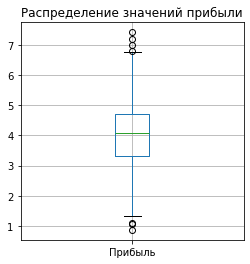

In [33]:
print(money['Прибыль'].describe())
money.boxplot(['Прибыль'], figsize=(4, 4)).set(xlabel='', ylabel='', title='Распределение значений прибыли')
plt.show()

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


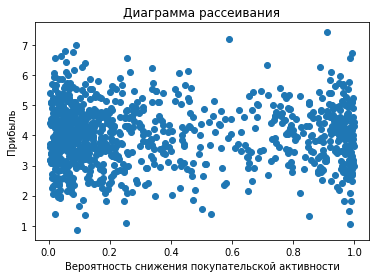

In [34]:
probas = pd.DataFrame(data=best_model.predict_proba(X_train_transformed), index=None, columns=['Class0', 'Class1'])
probas = probas.set_index(X_train.index)
plt.scatter(probas['Class1'], money['Прибыль'])
plt.xlabel('Вероятность снижения покупательской активности')
plt.ylabel('Прибыль')
plt.title('Диаграмма рассеивания')
plt.show()

count    972.000000
mean       0.380637
std        0.360713
min        0.003879
25%        0.071710
50%        0.207256
75%        0.778209
max        0.998899
Name: Class1, dtype: float64


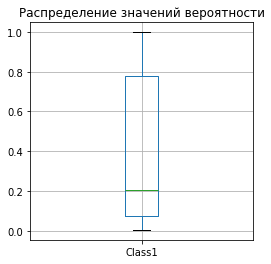

In [35]:
print(probas['Class1'].describe())
probas.boxplot(['Class1'], figsize=(4, 4)).set(xlabel='', ylabel='', title='Распределение значений вероятности')
plt.show()

In [36]:
segment = pd.concat([X_train, probas, money], axis=1)
print(len(segment))

#Покупатели с высокой (более 80%) вероятностью снижения покупательской активности
segment1 = segment.loc[segment['Class1'] > 0.8]
print(len(segment1))

#Среди них Покупатели с высокой (более 4.67) прибыльностью
segment2 = segment1.loc[segment1['Прибыль'] > 4.67]
print(len(segment2))

972
226
49


<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

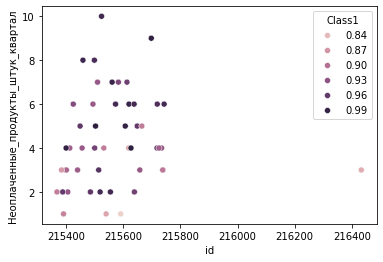

In [37]:
#display(segment2)
sns.scatterplot(data=segment2, x='id', y='Неоплаченные_продукты_штук_квартал', hue='Class1');

In [38]:
valued_customers = X_train.loc[money[money['Прибыль'] > 4.67].index]
print('Покупатели, приносящие большую выручку: ', len(valued_customers))

Покупатели, приносящие большую выручку:  254


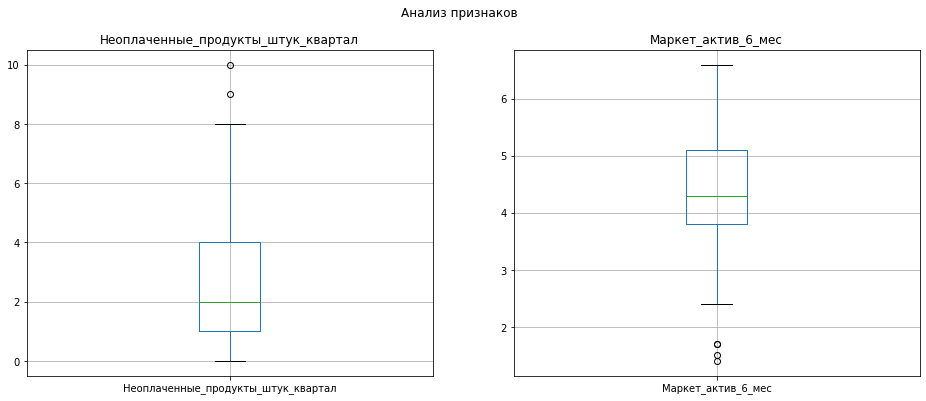

50%    2.0
75%    4.0
Name: Неоплаченные_продукты_штук_квартал, dtype: float64
50%    4.3
75%    5.1
Name: Маркет_актив_6_мес, dtype: float64


In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

valued_customers.boxplot(['Неоплаченные_продукты_штук_квартал'], ax=axes[0]).set(xlabel='', ylabel='', title='Неоплаченные_продукты_штук_квартал')
valued_customers.boxplot(['Маркет_актив_6_мес'], ax=axes[1]).set(xlabel='', ylabel='', title='Маркет_актив_6_мес')

plt.suptitle('Анализ признаков')
plt.show()

print(valued_customers['Неоплаченные_продукты_штук_квартал'].describe().loc[['50%', '75%']])
print(valued_customers['Маркет_актив_6_мес'].describe().loc[['50%', '75%']])

In [40]:
segment1 = valued_customers[
    (valued_customers['Неоплаченные_продукты_штук_квартал'] > 3) & (valued_customers['Маркет_актив_6_мес'] > 4)
]
print('Покупатели, приносящие большую выручку, с брошенными корзинами: ', len(segment1))

Покупатели, приносящие большую выручку, с брошенными корзинами:  45


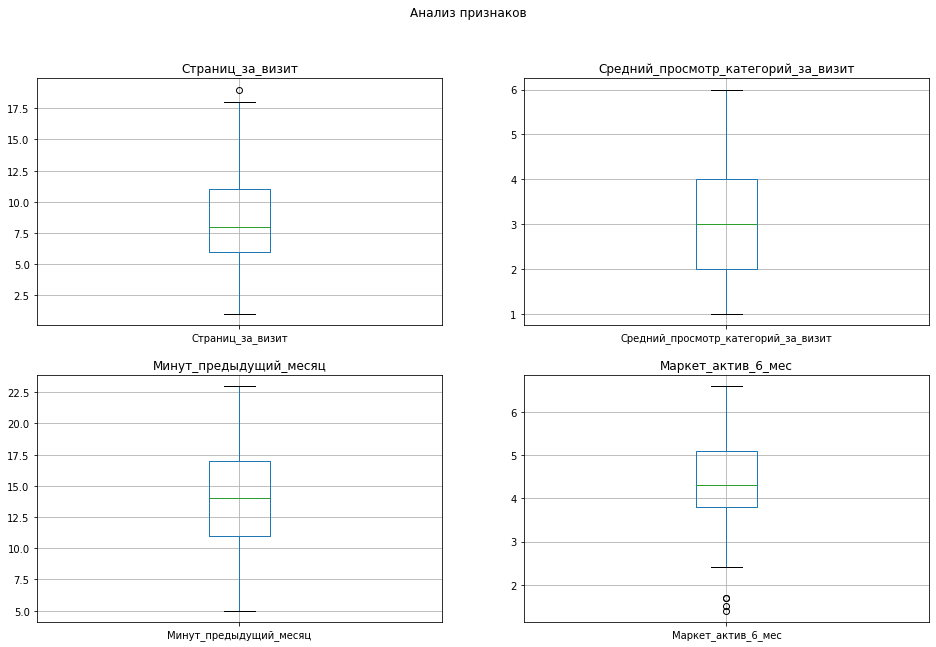

50%     8.0
75%    11.0
Name: Страниц_за_визит, dtype: float64
50%    3.0
75%    4.0
Name: Средний_просмотр_категорий_за_визит, dtype: float64
50%    14.0
75%    17.0
Name: Минут_предыдущий_месяц, dtype: float64
50%    4.3
75%    5.1
Name: Маркет_актив_6_мес, dtype: float64


In [41]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

valued_customers.boxplot(['Страниц_за_визит'], ax=axes[0, 0]).set(xlabel='', ylabel='', title='Страниц_за_визит')
valued_customers.boxplot(['Средний_просмотр_категорий_за_визит'], ax=axes[0, 1]).set(xlabel='', ylabel='', title='Средний_просмотр_категорий_за_визит')
valued_customers.boxplot(['Минут_предыдущий_месяц'], ax=axes[1, 0]).set(xlabel='', ylabel='', title='Минут_предыдущий_месяц')
valued_customers.boxplot(['Маркет_актив_6_мес'], ax=axes[1, 1]).set(xlabel='', ylabel='', title='Маркет_актив_6_мес')

plt.suptitle('Анализ признаков')
plt.show()

print(valued_customers['Страниц_за_визит'].describe().loc[['50%', '75%']])
print(valued_customers['Средний_просмотр_категорий_за_визит'].describe().loc[['50%', '75%']])
print(valued_customers['Минут_предыдущий_месяц'].describe().loc[['50%', '75%']])
print(valued_customers['Маркет_актив_6_мес'].describe().loc[['50%', '75%']])

In [42]:
segment2 = valued_customers[
    (valued_customers['Страниц_за_визит'] > 8) & 
    (valued_customers['Средний_просмотр_категорий_за_визит'] > 3) &
    (valued_customers['Минут_предыдущий_месяц'] > 14) &
    (valued_customers['Маркет_актив_6_мес'] > 4)
]
print('Покупатели, приносящие большую выручку, активные пользователи сайта: ', len(segment2))

Покупатели, приносящие большую выручку, активные пользователи сайта:  21


In [43]:
valued_customers_electronics = valued_customers.loc[valued_customers['Популярная_категория'] == 'мелкая бытовая техника и электроника']

segment3 = valued_customers_electronics[(valued_customers['Маркет_актив_6_мес'] > 4)]

print('Покупатели, приносящие большую выручку, покупатели мелкой бытовой техники: ', len(segment2))

Покупатели, приносящие большую выручку, покупатели мелкой бытовой техники:  21


/tmp/ipykernel_155/3313260938.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  segment3 = valued_customers_electronics[(valued_customers['Маркет_актив_6_мес'] > 4)]


## Общий вывод ##
Сделайте общий вывод:
- [ ] опишите задачу;
- [x] опишите исходные данные и проведённую предобработку;
- [ ] напишите, что вы сделали для поиска лучшей модели;
- [x] укажите лучшую модель;
- [X] добавьте выводы и дополнительные предложения для выбранного сегмента покупателей.

#### Исходные данные и предобработка ####
* Загрузили 4 датасета: market_file, market_money, market_time, money
* Все данные привели к нижнему регистру, названия колонок – с прописной. Исправили опечатки
* Удалили клиентов с нулевым значением выручки и выбросы с аномально высокими значениями выручки

#### Анализ данных ####
* Среднемесячное количество коммуникаций не менялось за последние 6 месяцев и в среднем составляет 4
* Доля покупок по акции обычно низкая (доля от 0.2 до 0.4), но видна группа покупателей баунти-хантеров, покупающи преимущественно по акциям (доля более 0.8)
* В признаках 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать' наблюдаем дисбалланс классов. Данные в датасетах market_money, market_time, money распределены околонормально
* Сильной (более 0.9) корреляции (мультиколлинеарности) между признаками не обнаружили

#### Результаты моделирования ####
* Лучший результат показала модель LogisticRegression с гиперпараметрами C=1 и penalty=l1
* Оценка модели по метрике roc_auc на тренировочной выборке: 0.89615

#### Анализ признаков #### 
* Наименее значимые признаки. Снижение активности не зависит от:
  * уровня сервиса и одинаково наблюдается в стандарте и премиуме (_Тип сервиса_)
  * согласия на получение маркетинговой информации (_Разрешить сообщать_нет_)
  * данных текущего месяца (_Выручка_текущий_месяц_, _Маркет_актив_тек_мес_)
  * категорий 'Косметика и аксесуары' и 'Товары для детей'
* Наиболее значимые признаки. Снижение активности сильнее всего зависит от:
  * активности на сайте (_Страниц_за_визит_, _Средний_просмотр_категорий_за_визит_, _Минут_предыдущий_месяц_)
  * числа неоплаченных товаров в корзине за последние 3 месяца (_Неоплаченные_продукты_штук_квартал_)
  * среднемесячнай доля покупок по акции от общего числа покупок за последние 6 месяцев (_Акционные_покупки_)
  * среднемесячного значения маркетинговых коммуникаций за последние 6 месяцев (_Маркет_актив_6_мес_)
  * категорий 'Мелкая бытовая техника и электроника' (сильнее) и 'Техника для красоты и здоровья' (слабее)
* Признак _Минут_текущий_месяц_ имеет среднее влияние на снижение активности. Скорее всего, он бы влиял сильнее, если бы данные были полными, за весь месяц (анализ другие признаков показывает, что данные текущего месяца имеют слабое влияние, а анализ признаков поведения на сайте – высокое)

#### Выводы ####
* низкая активность на сайте свидетельствует о снижении покупательской активности
* брошенные корзины, наоборот, свидетельствуют о скором оттоке клиентов
* покупатели товаров по акции склонны не покупать в дальнейшем (гипотеза: такие покупатели ищут скидки и нелояльны компании)
* на покупательскую активность хорошо влияют маркетинговые кампании
* наличие покупок в категориях 'Мелкая бытовая техника и электроника' (сильнее) и 'Техника для красоты и здоровья' хорошо противодействует оттоку
* непонятно, как использовать данные о выручке

#### Рекомендации ####
* **Чемпионы по бросанию корзин** (высокое влияние признаков _Неоплаченные_продукты_штук_квартал_ и _Маркет_актив_6_мес_)
  * _Сегмент_: покупатели, приносящие большую выручку, с брошенными корзинами – 45 клиентов
  * _Действие_: отправлять напоминания о брошенных корзинах клиентам
* **Профессиональные серферы** (высокое влияние признаков _Страниц_за_визит_, _Средний_просмотр_категорий_за_визит_, _Минут_предыдущий_месяц_,  _Маркет_актив_6_мес_)
  * _Сегмент_: покупатели, приносящие большую выручку, активные пользователи сайта – 21 клиент
  * _Действие_: стимулировать активность на сайте, в частности – просмотры разных категорий, за счет дополнительных рекомендательных полок и рассылок
* **Любители гаджетов** (высокое влияние признаков _Мелкая бытовая техника и электроника_,  _Маркет_актив_6_мес_)
  * _Сегмент_: покупатели, приносящие большую выручку, покупатели мелкой бытовой техники – 21 клиент
  * _Действие_: cтимулировать продажи в категории 'Мелкая бытовая техника и электроника' за счет дополнительных рекомендательных полок и рассылок

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Владимир, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
Выводы и рассуждения получились содержательными, их было интересно читать.
</font>

<font color='steelblue'>Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.

Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)

Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.

Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)</font>

<font color='blue'><b>Жду твой проект на повторном ревью. До встречи :) </b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'> Владимир, проект принят! \
Все этапы пройдены. Все рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>